Testing different Autoencoders

In [8]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
mnist = keras.datasets.mnist
(X_train, label_train), (X_test, label_test) = mnist.load_data()

In [10]:
image_size = X_train.shape[1]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [11]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [12]:
X_train.shape

(60000, 784)

### Vanilla AE

In [13]:
input_size = 784
hidden_size = 64
output_size = 784

x = Input(shape=(input_size,))

# Encoder
h = Dense(hidden_size, activation='relu')(x)

# Decoder
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

In [14]:
epochs = 5
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                          validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.0444 - val_loss: 0.0227
Epoch 2/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.0178 - val_loss: 0.0133
Epoch 3/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.0112 - val_loss: 0.0088
Epoch 4/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.0078 - val_loss: 0.0066
Epoch 5/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0062 - val_loss: 0.0055


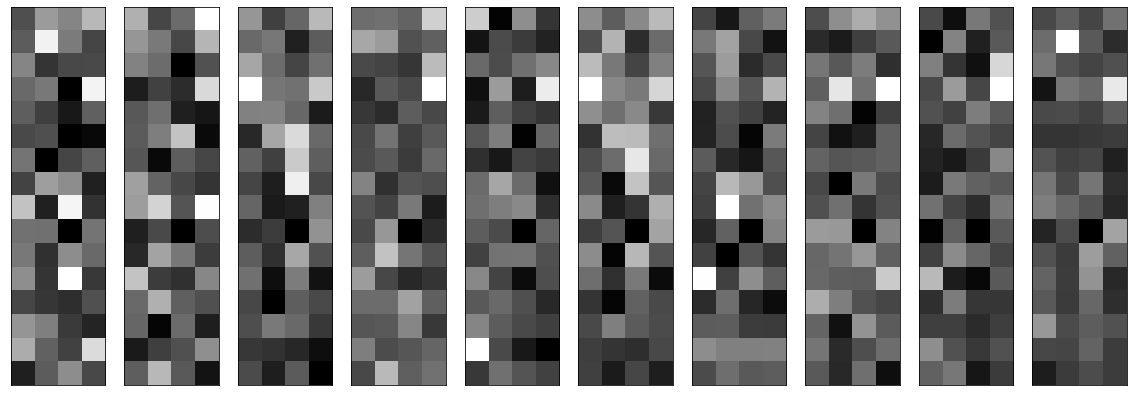

In [7]:
conv_encoder = Model(x, h)
encoded_imgs = conv_encoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

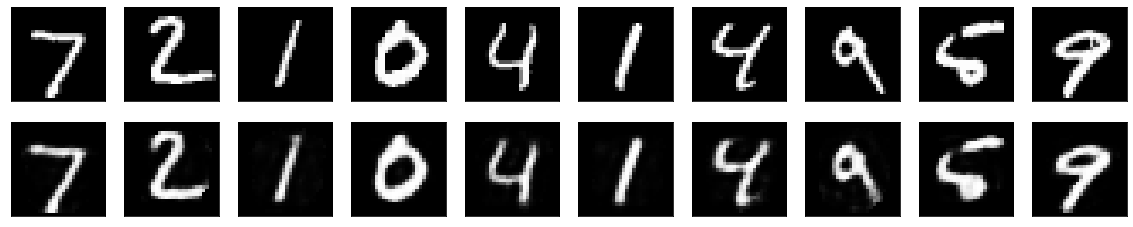

In [16]:
decoded_imgs = autoencoder.predict(X_test)
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

dict_keys(['loss', 'val_loss'])


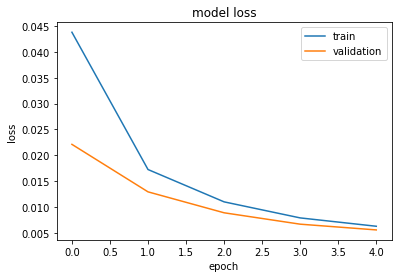

In [9]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

### Multilayer AE

In [10]:
input_size = 784
hidden_size = 128
code_size = 64

x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

In [11]:
epochs = 5
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, 
                          verbose=1, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0422 - val_loss: 0.0199
Epoch 2/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0166 - val_loss: 0.0137
Epoch 3/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0125 - val_loss: 0.0109
Epoch 4/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0103 - val_loss: 0.0092
Epoch 5/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0091 - val_loss: 0.0084


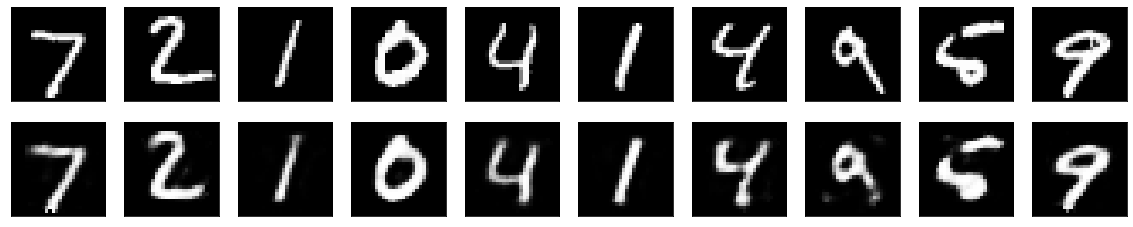

In [12]:
decoded_imgs = autoencoder.predict(X_test)
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### Sparse AE

In [14]:
input_size = 784
hidden_size = 32
output_size = 784

x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu', activity_regularizer=keras.regularizers.l1(10e-5))(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

In [15]:
epochs = 15
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, 
                          verbose=1, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0599 - val_loss: 0.0365
Epoch 2/15
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0317 - val_loss: 0.0273
Epoch 3/15
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0251 - val_loss: 0.0226
Epoch 4/15
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0216 - val_loss: 0.0200
Epoch 5/15
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0195 - val_loss: 0.0185
Epoch 6/15
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0184 - val_loss: 0.0176
Epoch 7/15
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0176 - val_loss: 0.0170
Epoch 8/15
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0170 - val_loss: 0.0164
Epoch 9/15
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0166 - val_

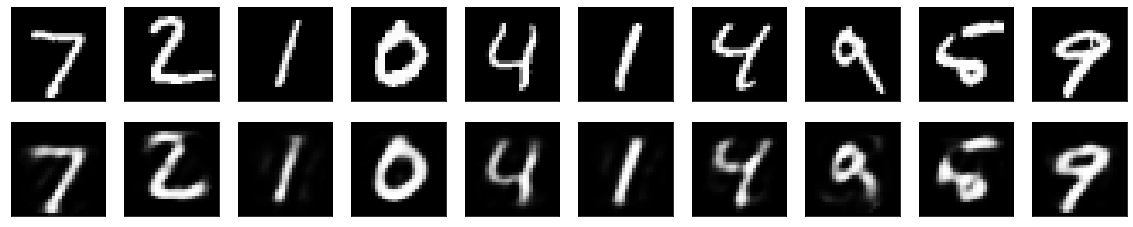

In [16]:
decoded_imgs = autoencoder.predict(X_test)
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

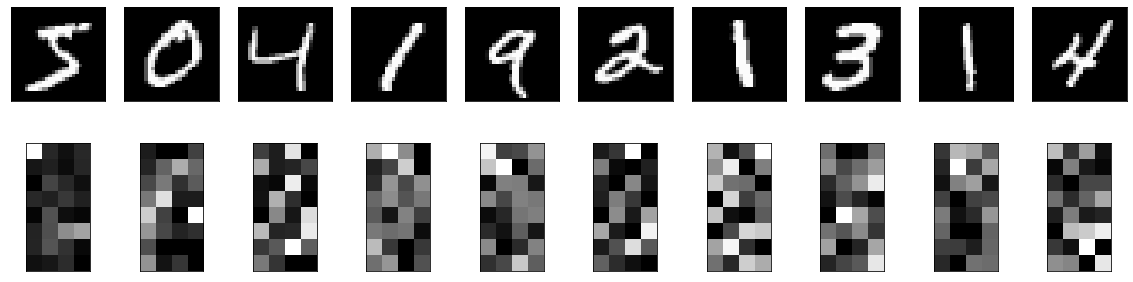

In [27]:
conv_encoder = Model(x, h)
encoded_imgs = conv_encoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(encoded_imgs[i].reshape(4, 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Denoising autoencoder

In [28]:
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

In [29]:
input_size = 784
hidden_size = 32
output_size = 784

x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

In [30]:
epochs = 15
batch_size = 128
history = autoencoder.fit(X_train_noisy, X_train, batch_size=batch_size, 
                          epochs=epochs, verbose=1, validation_data=(X_test_noisy, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0595 - val_loss: 0.0390
Epoch 2/15
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0347 - val_loss: 0.0304
Epoch 3/15
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0284 - val_loss: 0.0259
Epoch 4/15
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0247 - val_loss: 0.0232
Epoch 5/15
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0229 - val_loss: 0.0221
Epoch 6/15
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0221 - val_loss: 0.0215
Epoch 7/15
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0216 - val_loss: 0.0213
Epoch 8/15
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0214 - val_loss: 0.0211
Epoch 9/15
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0212 - val_

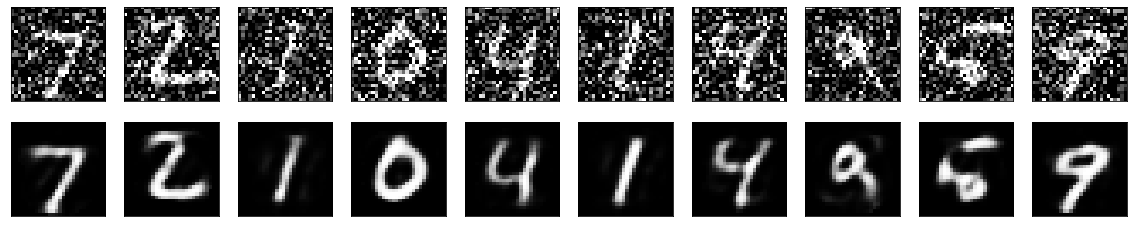

In [31]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

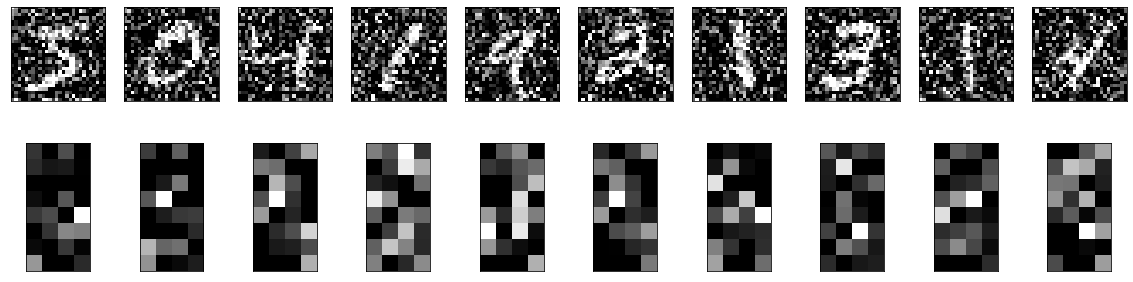

In [35]:
conv_encoder = Model(x, h)
encoded_imgs = conv_encoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(encoded_imgs[i].reshape(4, 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()